# 1. Problem Statement

## 1.1 Objectives
The objective of this performance study is to evaluate and compare various classification models available in sklearn using a comprehensive dataset of 2,105 patients diagnosed with Parkinson's Disease. Specifically, the study aims to achieve the following objectives:

1. Implement and benchmark multiple classification algorithms.
2. Assess the predictive accuracy, precision, recall, F1-score of each model.
3. Identify the most effective classification model for predicting Parkinson's Disease.

## 1.2 Motivation
Parkinson's Disease (PD) presents a significant public health challenge, requiring accurate diagnostic tools and predictive models to improve patient outcomes and inform clinical decision-making. This performance study is motivated by the need to systematically evaluate and compare various classification algorithms using a rich dataset encompassing diverse health-related variables. By rigorously analyzing the performance metrics of different models, we aim to:

* Provide insights into which classification algorithms are most suitable for predicting Parkinson's Disease based on different types of data.
* Enhance understanding of how preprocessing techniques impact model performance.
* Facilitate the development of robust predictive models that can assist clinicians in early diagnosis and personalized treatment strategies.
* Contribute to the broader research community by establishing best practices in applying machine learning techniques to neurological disorders.

## 1.3 Methodology
In order to analyze the performance regarding the scikit-learn models available for binary classification, we are going to use the following models:
1. Logistic Regression
2. Support Vector Machines (SVM)
3. Decision Tree
4. Random Forest
5. Gradient Boosting Machines
6. AdaBoost
7. Naïve Bayes
8. K-nearest Neighbors (KNN)
9. CatBoost Classifier
10. XGBoost Classifier

In [1]:
#Imports

import copy
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# 2. Dataset

In [2]:
df = pd.read_csv('parkinsons_disease_data.csv')

print(f'\n{df.info()}')
print(f'\nData shape: {df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

In [3]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [4]:
df = df.iloc[: , 1:-1]
header = list(df.iloc[: , :-1])

df.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,...,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,69.601900,0.492637,0.692637,1.337292,27.209493,0.296437,10.040413,5.016674,4.912901,6.996639,...,15.094314,4.989694,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477
std,11.594511,0.500065,1.003827,0.895840,7.208099,0.456795,5.687014,2.890919,2.872115,1.753065,...,8.643014,2.933877,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631
min,50.000000,0.000000,0.000000,0.000000,15.008333,0.000000,0.002228,0.004157,0.000011,4.000497,...,0.021191,0.001505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,0.000000,0.000000,1.000000,20.782176,0.000000,5.150278,2.455703,2.478503,5.488864,...,7.517160,2.415890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,70.000000,0.000000,0.000000,1.000000,27.184571,0.000000,10.070337,5.031550,4.825187,6.929819,...,14.963574,4.983227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,80.000000,1.000000,1.000000,2.000000,33.462452,1.000000,14.829565,7.512795,7.381487,8.558719,...,22.608362,7.484220,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,89.000000,1.000000,3.000000,3.000000,39.999887,1.000000,19.988866,9.995255,9.995864,9.999821,...,29.970107,9.992697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Verifying if there are null or duplicated values in the dataset
print(f'Number of null data:\n{df.isnull().sum()}')

# Check for duplicates
print(f'\nNumber of duplicated data:\n{df.duplicated().sum()}')

Number of null data:
Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
Diagnosis          

## 2.1 Categorical and Numerical Data

- Categorical Data:
    * Discrete Categories: Categorical data represents distinct groups or categories that lack a meaningful numerical order or magnitude. Examples include gender, color, or type of car.
    * Non-Quantifiable Differences: Differences between categories cannot be quantified meaningfully. For instance, the distinction between 'red' and 'blue' lacks a numerical value.
    
    
- Numerical Data:
    * Range and Continuity: For example, the DietQuality score ranges from 0 to 10, indicating it is measured on a continuous or discrete numerical scale. Each value within this range denotes a different level of diet quality.
    * Order and Magnitude: Numerical data exhibits meaningful order and magnitude. For instance, a score of 8 signifies higher diet quality compared to a score of 5, and the difference between scores (e.g., 8 vs. 5) is quantifiable.
    
We will analyze the distribution of numerical data and the differences in their ranges.

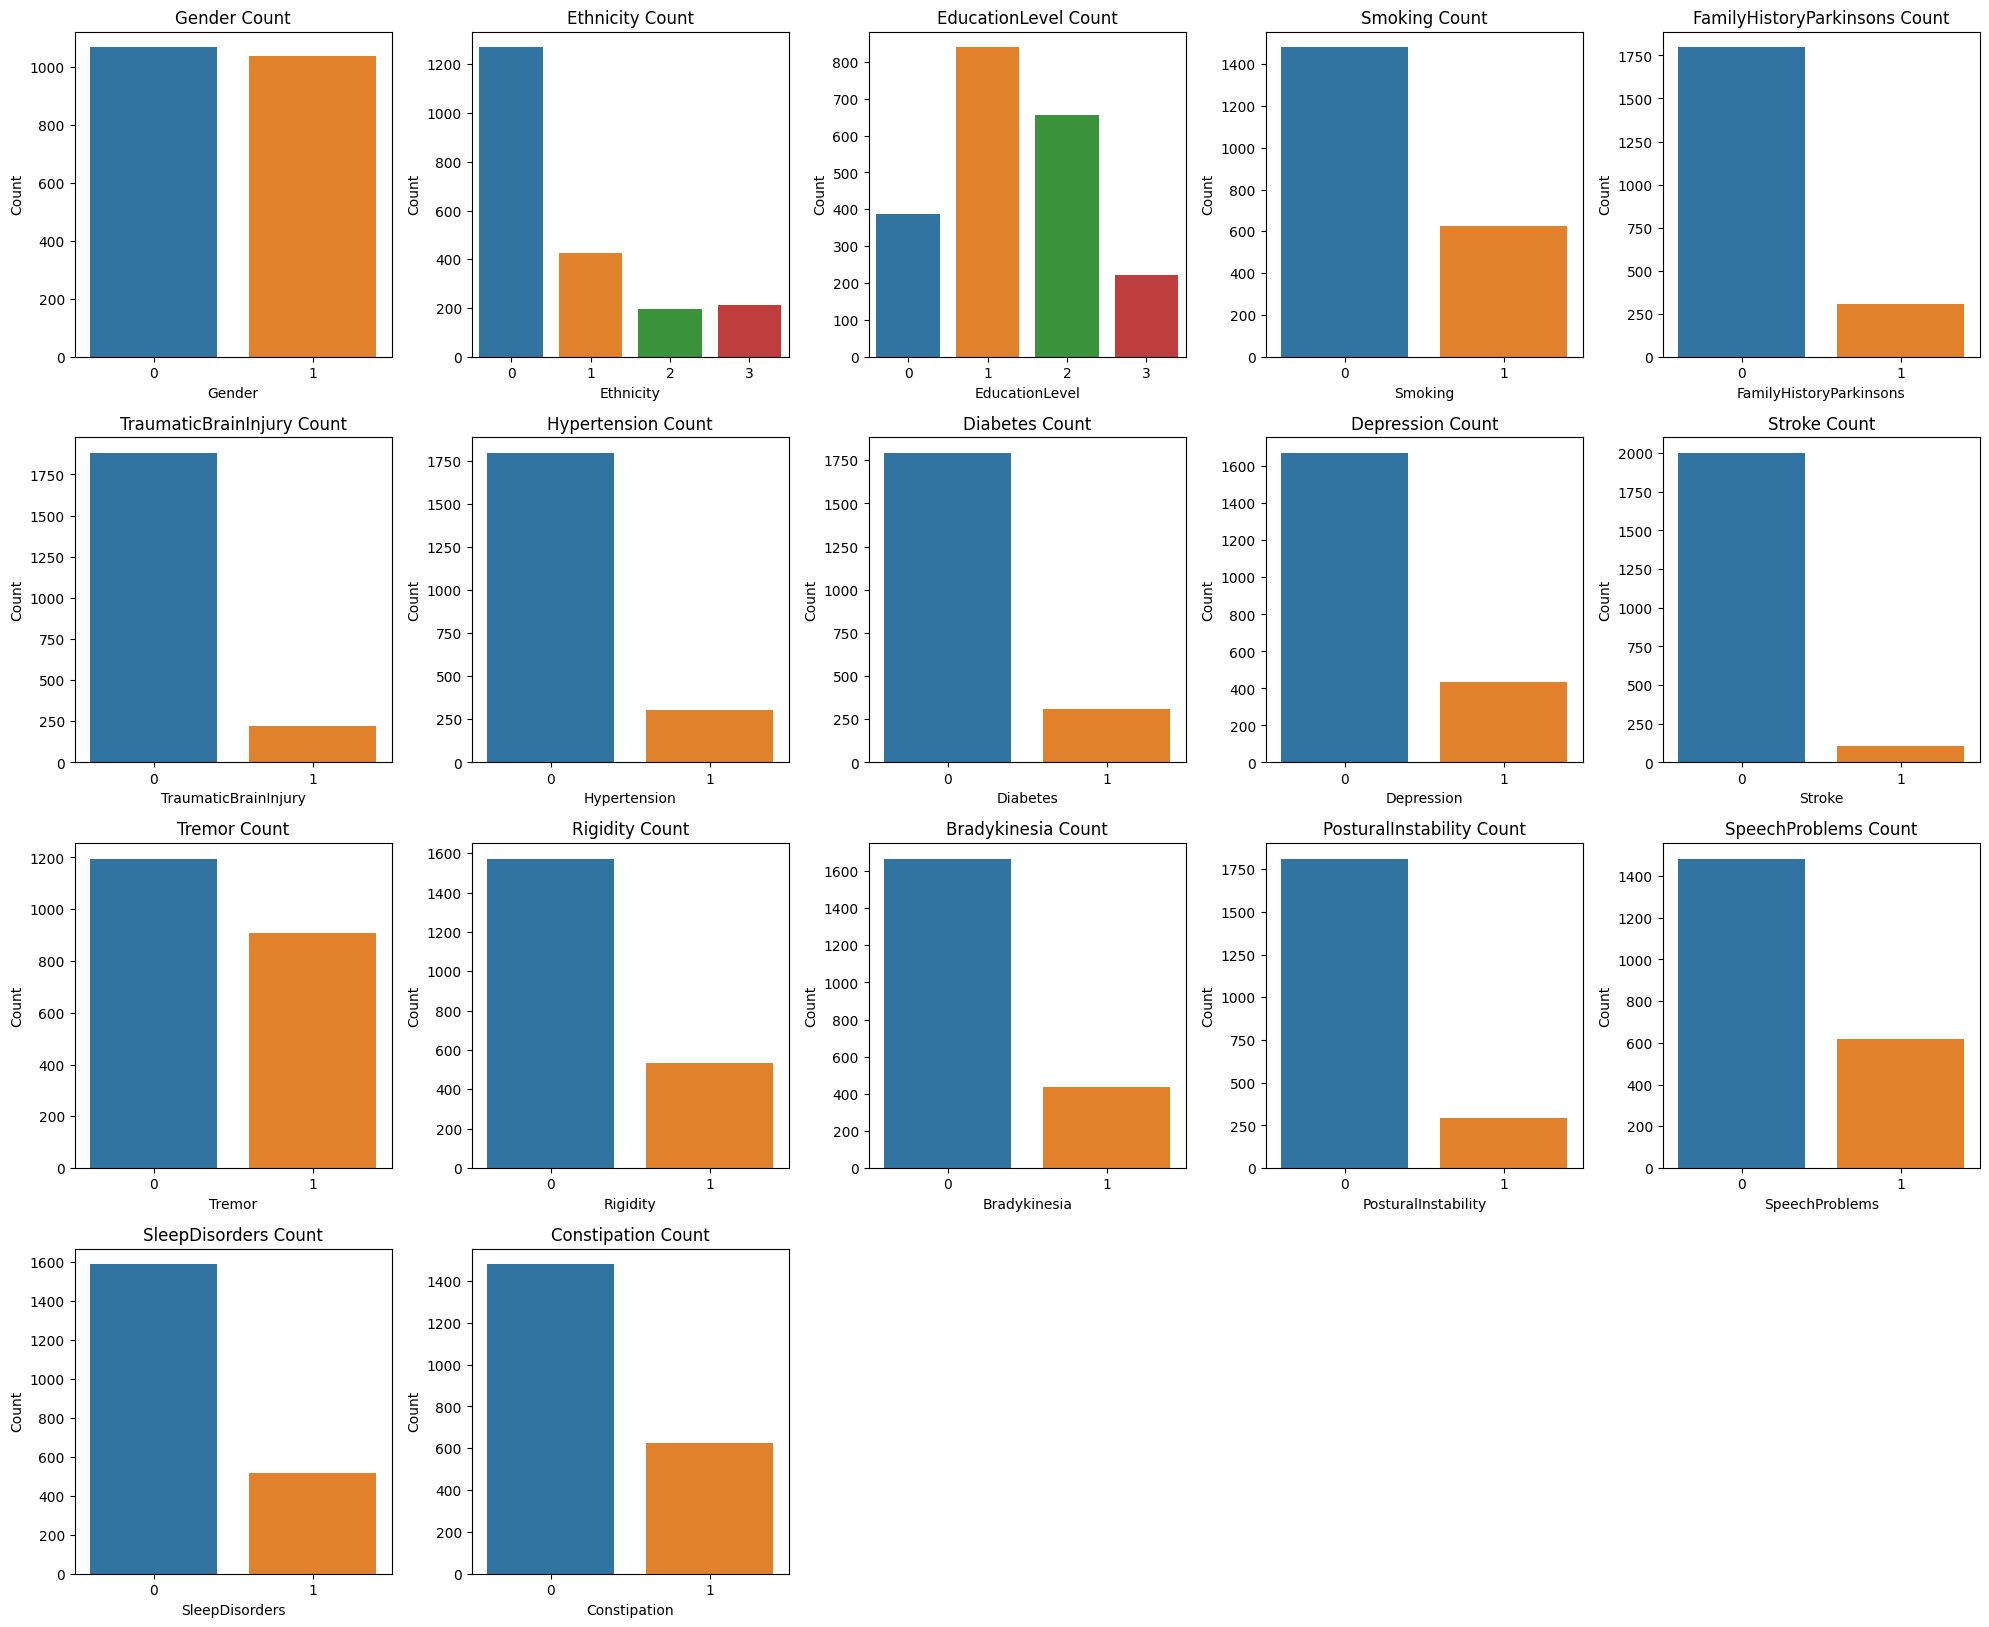

In [6]:
# Count plots for categorical features
categorical_columns = [
    'Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryParkinsons',
    'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke',
    'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems',
    'SleepDisorders', 'Constipation']

plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_columns):
    plt.subplot(5, 5, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Count')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

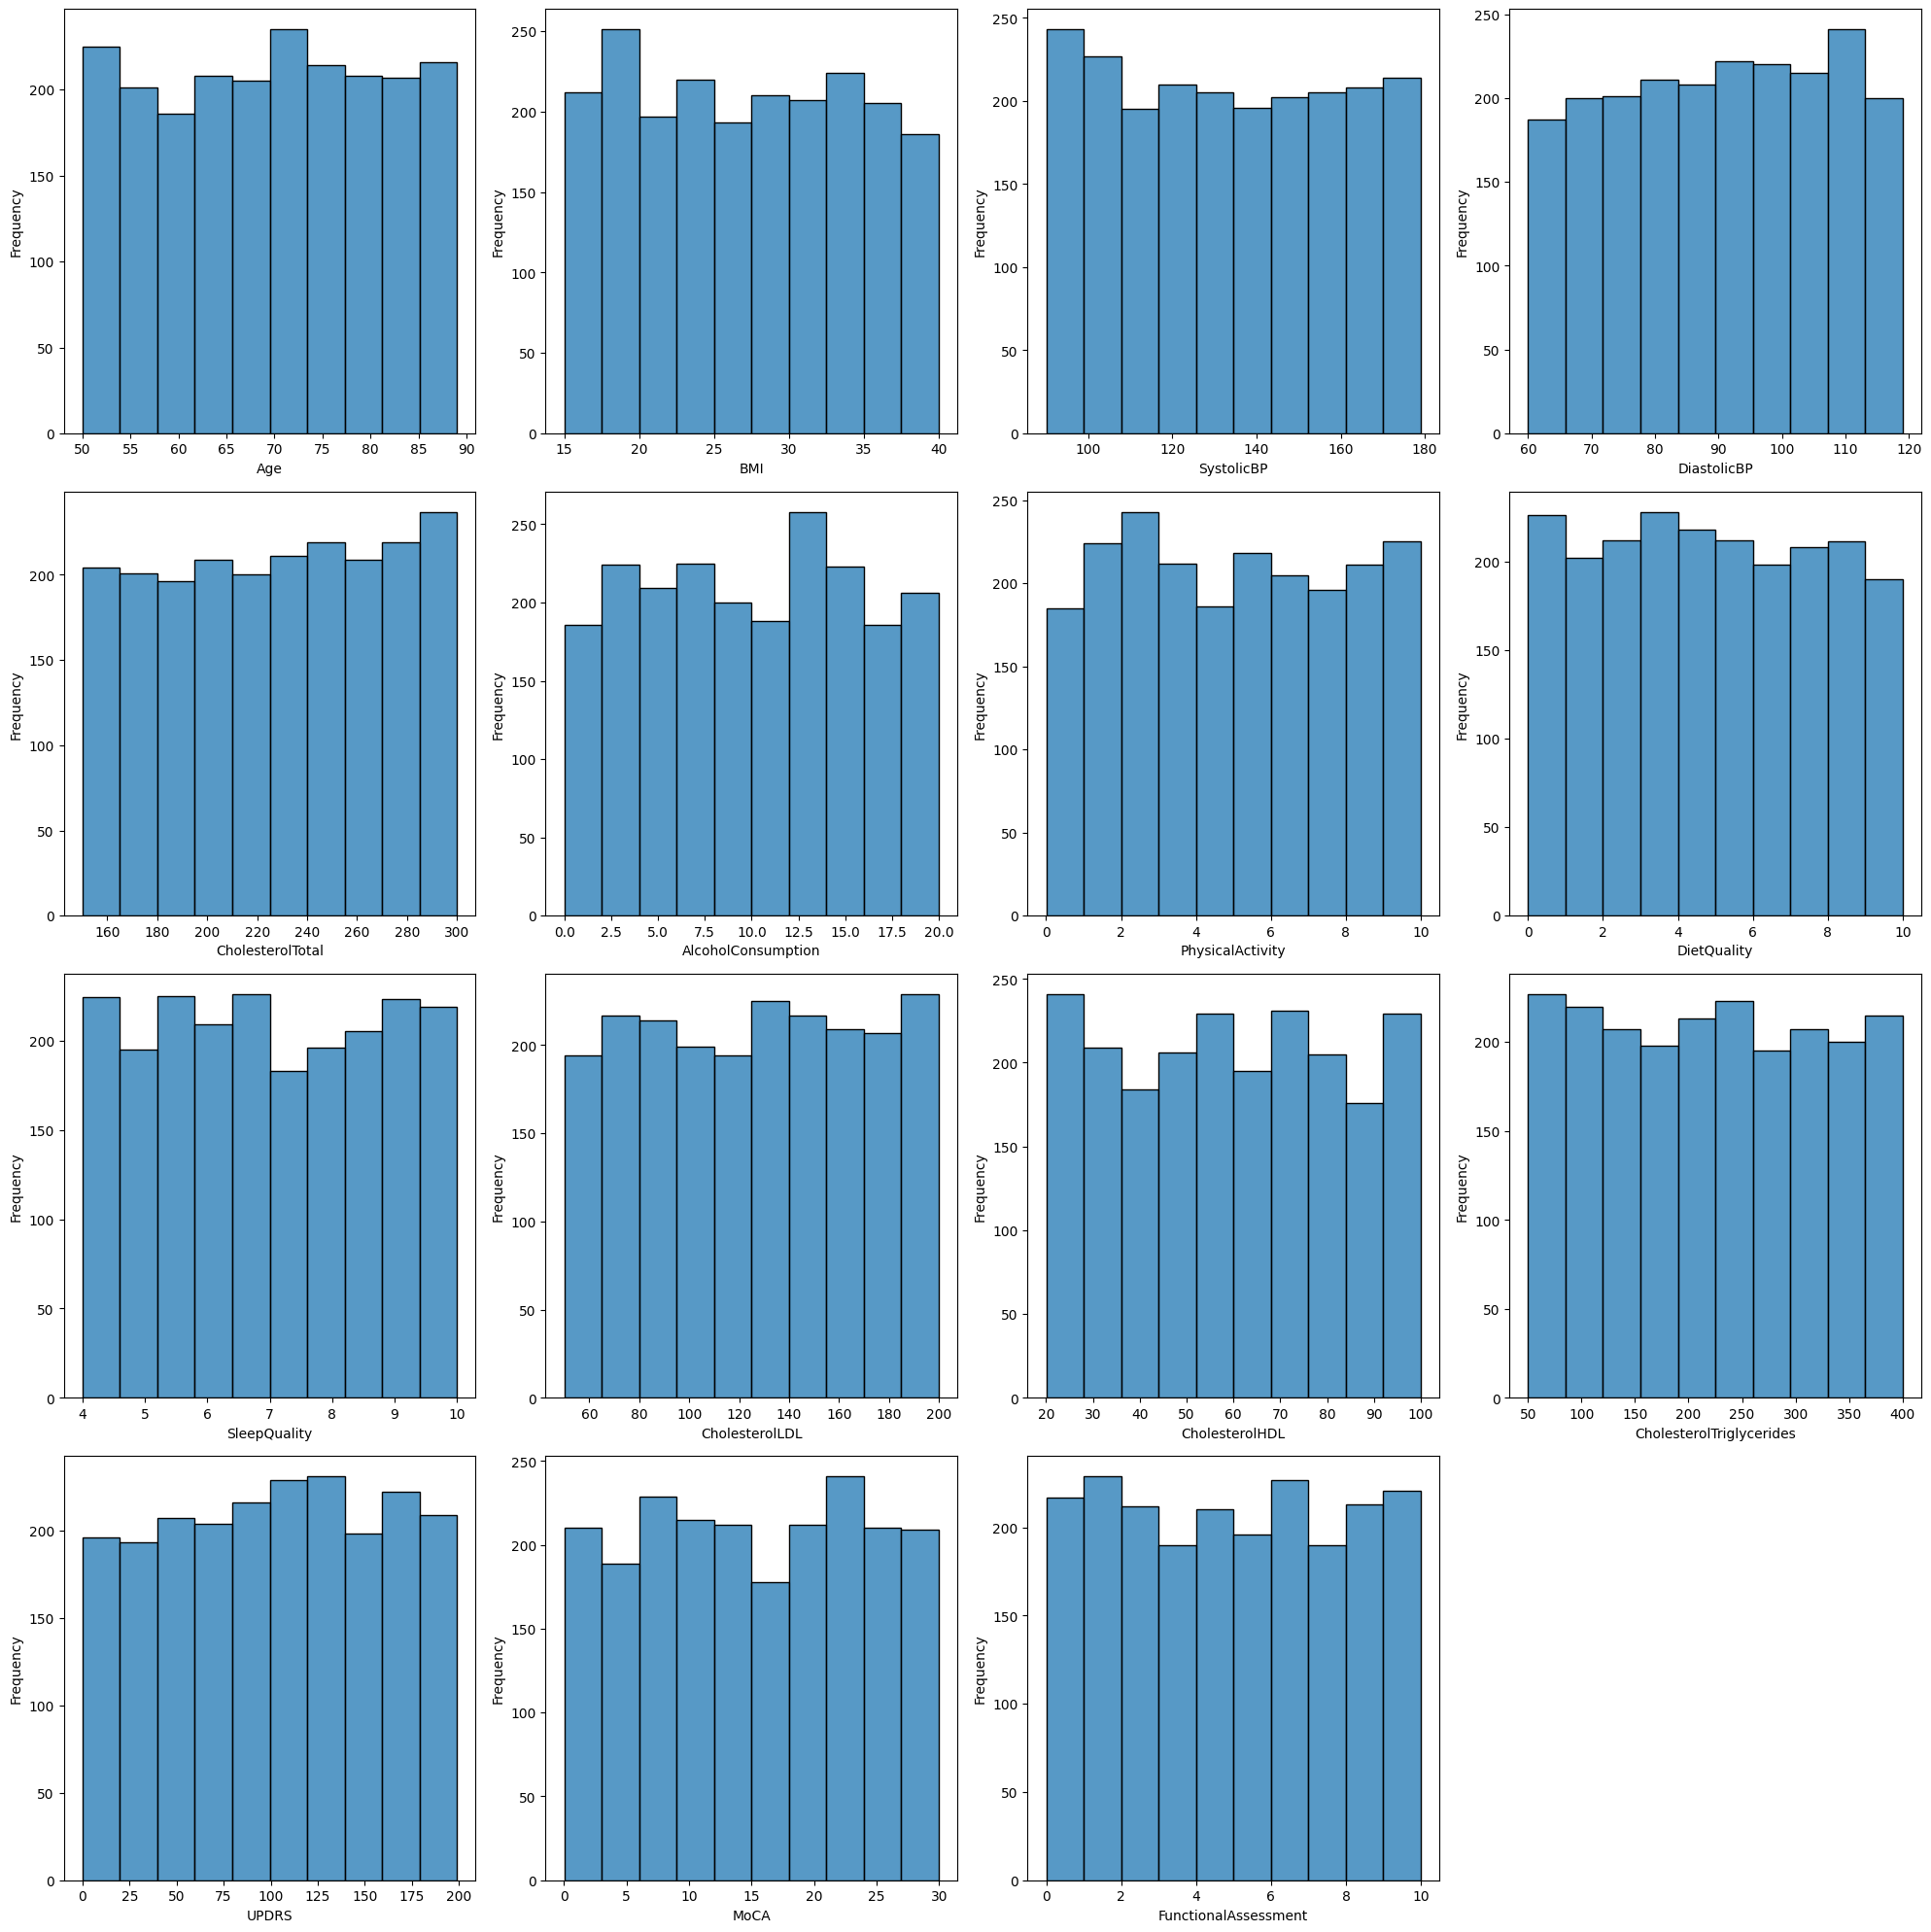

In [7]:
numerical_columns = [
    'Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'AlcoholConsumption',
    'PhysicalActivity', 'DietQuality', 'SleepQuality', 'CholesterolLDL', 'CholesterolHDL', 
    'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment']

# Distribution plots for numerical features
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], bins=10)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [8]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:, -1], test_size=0.20, random_state=42)
y_train, y_test = y_train.to_numpy(), y_test.to_numpy()

print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}, y_test shape: {y_test.shape}')

X_train shape: (1684, 32), X_test shape: (421, 32)
y_train shape: (1684,), y_test shape: (421,)


## 2.2 Numerical Data Normalization

Since we observe numerical features with distinct values, we can apply normalization to bring these values within a closer range. We will use the `StandardScaler()` method, also known as Z-score normalization, which standardizes features by removing the mean and scaling to unit variance:

$$ z = \frac{x - \mu}{\sigma} $$

The recommended approach is to normalize the data after splitting it into training and testing sets. The rationale behind this recommendation is to prevent any information leakage from the testing set into the training set, which can lead to over-optimistic results and unrealistic performance evaluations [[1]](https://medium.com/@spinjosovsky/normalize-data-before-or-after-split-of-training-and-testing-data-7b8005f81e26).

In [9]:
scaler = StandardScaler()

#Normalizing data
X_train_norm, X_test_norm = copy.deepcopy(X_train), copy.deepcopy(X_test) 
X_train_norm = scaler.fit_transform(X_train_norm)
X_test_norm = scaler.transform(X_test_norm) 

print(f'X_train shape: {X_train_norm.shape}, X_test shape: {X_test_norm.shape}')
print(f'\n{X_train_norm[:5, 0]}\n{y_test[:5]}')

X_train shape: (1684, 32), X_test shape: (421, 32)

[ 0.12652736 -0.90864064 -1.33996064  0.12652736  0.04026336]
[0 1 0 1 1]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


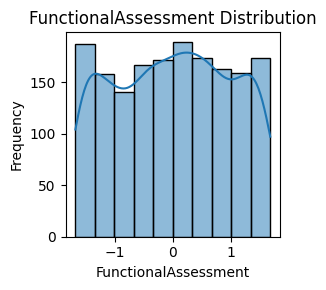

In [10]:
# Distribution for Age feature - Normalized Data
plt.figure(figsize=(3,3))
sns.histplot(X_train_norm[:, 0], bins=10, kde=True)
plt.title(f'{col} Distribution')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 3. Testing Models Performance

Metrics:

1. Accuracy:
    * Definition: Accuracy measures the proportion of correctly classified instances (both true positives and true negatives) out of the total number of instances.
    * Use Case: Useful when the classes are balanced (approximately equal number of instances for each class).
2. Precision:
    * Definition: Precision measures the proportion of true positive predictions (correctly predicted positives) out of all positive predictions made by the model.
    * Use Case: Important when the cost of false positives is high (e.g., misdiagnosing a healthy person as having Parkinson's Disease).
3. Recall (Sensitivity):
    * Definition: Recall measures the proportion of true positives (correctly predicted positives) out of all actual positive instances.
    * Use Case: Important when the cost of false negatives is high (e.g., failing to diagnose a patient who actually has Parkinson's Disease).
4. F1-score:
    * Definition: The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall.
    * Use Case: Useful when you need to consider both false positives and false negatives equally important.

## 3.1 Logistic Regression

Logistic Regression Model Metrics:
	Accuracy: 0.7767
	Precision: 0.8149
	Recall: 0.8450
	F1 Score: 0.8297


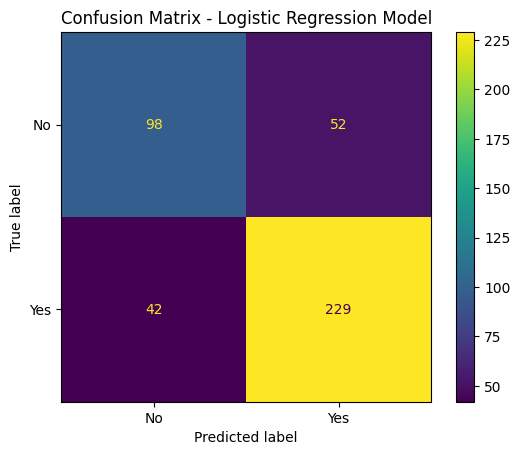

In [11]:
#Defining the model - Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=10000).fit(X_train_norm, y_train)
y_pred_log = log_reg.predict(X_test_norm)

print(f'Logistic Regression Model Metrics:')
print(f'\tAccuracy: {accuracy_score(y_test, y_pred_log):.4f}')
print(f'\tPrecision: {precision_score(y_test, y_pred_log):.4f}')
print(f'\tRecall: {recall_score(y_test, y_pred_log):.4f}')
print(f'\tF1 Score: {f1_score(y_test, y_pred_log):.4f}')

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_log), display_labels = ['No', 'Yes'])
cm_display.plot()
plt.title("Confusion Matrix - Logistic Regression Model")
plt.show()

## 3.2 Support Vector Machines

SVM Model Metrics:
	Accuracy: 0.7838
	Precision: 0.8169
	Recall: 0.8561
	F1 Score: 0.8360


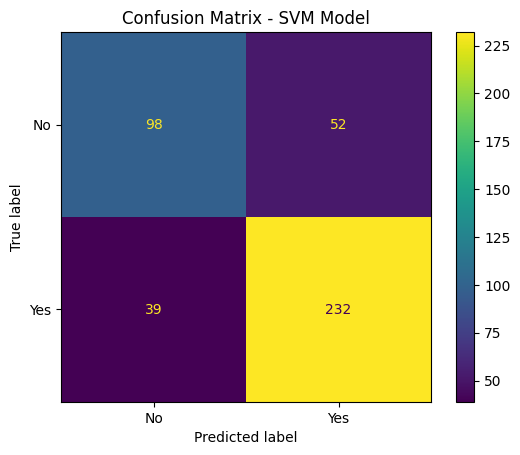

In [12]:
#Defining the model - Support Vector Machines
clf = SVC(random_state=42).fit(X_train_norm, y_train)
y_pred_svm = clf.predict(X_test_norm)

print(f'SVM Model Metrics:')
print(f'\tAccuracy: {accuracy_score(y_test, y_pred_svm):.4f}')
print(f'\tPrecision: {precision_score(y_test, y_pred_svm):.4f}')
print(f'\tRecall: {recall_score(y_test, y_pred_svm):.4f}')
print(f'\tF1 Score: {f1_score(y_test, y_pred_svm):.4f}')

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_svm), display_labels = ['No', 'Yes'])
cm_display.plot()
plt.title("Confusion Matrix - SVM Model")
plt.show()

## 3.3 Decision Tree

Decision Tree Model Metrics:
	Accuracy: 0.8741
	Precision: 0.9129
	Recall: 0.8893
	F1 Score: 0.9009


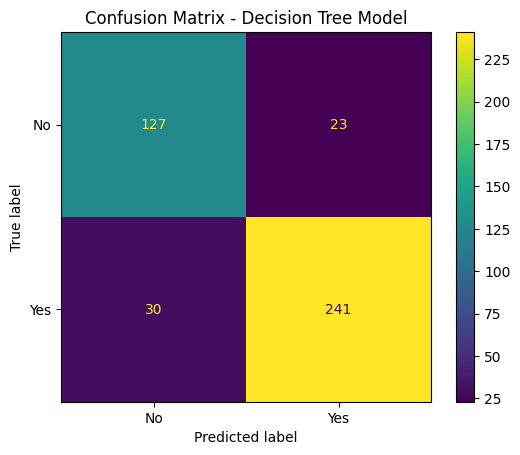

In [13]:
#Defining the model - Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42).fit(X_train_norm, y_train)
y_pred_dt = clf.predict(X_test_norm)

print(f'Decision Tree Model Metrics:')
print(f'\tAccuracy: {accuracy_score(y_test, y_pred_dt):.4f}')
print(f'\tPrecision: {precision_score(y_test, y_pred_dt):.4f}')
print(f'\tRecall: {recall_score(y_test, y_pred_dt):.4f}')
print(f'\tF1 Score: {f1_score(y_test, y_pred_dt):.4f}')

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_dt), display_labels = ['No', 'Yes'])
cm_display.plot()
plt.title("Confusion Matrix - Decision Tree Model")
plt.show()

## 3.4 Random Forest

Random Forest Model Metrics:
	Accuracy: 0.9121
	Precision: 0.9466
	Recall: 0.9151
	F1 Score: 0.9306


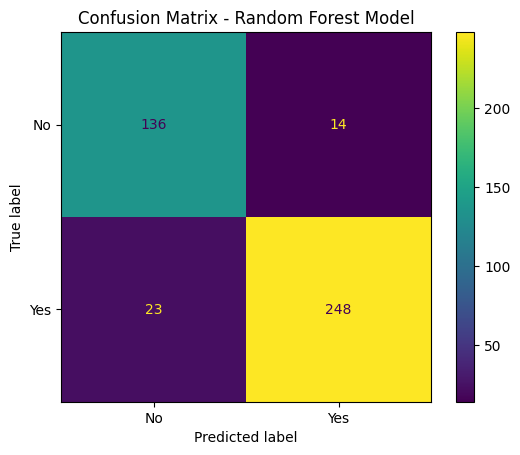

In [14]:
#Defining the model - Random Forest Classifier 
clf = RandomForestClassifier(max_depth=10, random_state=42).fit(X_train_norm, y_train)
y_pred_rfc = clf.predict(X_test_norm)

print(f'Random Forest Model Metrics:')
print(f'\tAccuracy: {accuracy_score(y_test, y_pred_rfc):.4f}')
print(f'\tPrecision: {precision_score(y_test, y_pred_rfc):.4f}')
print(f'\tRecall: {recall_score(y_test, y_pred_rfc):.4f}')
print(f'\tF1 Score: {f1_score(y_test, y_pred_rfc):.4f}')

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_rfc), display_labels = ['No', 'Yes'])
cm_display.plot()
plt.title("Confusion Matrix - Random Forest Model")
plt.show()

## 3.5 Gradient Boosting

Gradient Boosting Model Metrics:
	Accuracy: 0.9145
	Precision: 0.9434
	Recall: 0.9225
	F1 Score: 0.9328


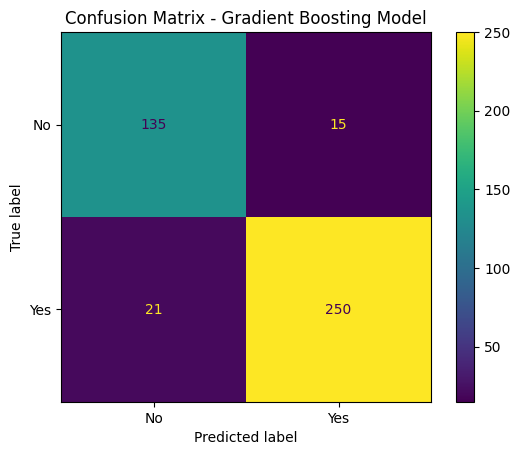

In [15]:
#Defining the model - GradientBoosting Classifier
clf = GradientBoostingClassifier(learning_rate=0.07, random_state=42).fit(X_train_norm, y_train)
y_pred_gbc = clf.predict(X_test_norm)

print(f'Gradient Boosting Model Metrics:')
print(f'\tAccuracy: {accuracy_score(y_test, y_pred_gbc):.4f}')
print(f'\tPrecision: {precision_score(y_test, y_pred_gbc):.4f}')
print(f'\tRecall: {recall_score(y_test, y_pred_gbc):.4f}')
print(f'\tF1 Score: {f1_score(y_test, y_pred_gbc):.4f}')

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_gbc), display_labels = ['No', 'Yes'])
cm_display.plot()
plt.title("Confusion Matrix - Gradient Boosting Model")
plt.show()

## 3.6 AdaBoost

AdaBoost Model Metrics:
	Accuracy: 0.9240
	Precision: 0.9377
	Recall: 0.9446
	F1 Score: 0.9412


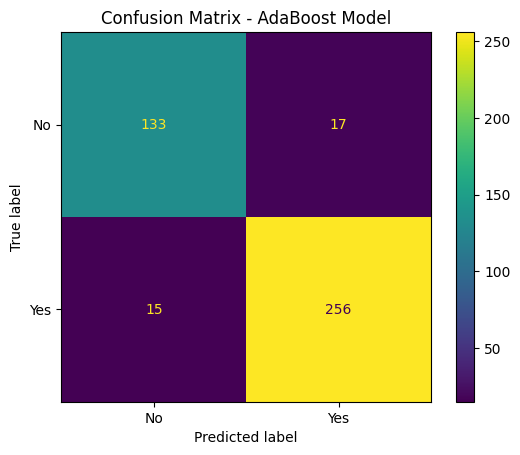

In [16]:
#Defining the model - AdaBoost Classifier
clf = AdaBoostClassifier(random_state=42).fit(X_train_norm, y_train)
y_pred_abc = clf.predict(X_test_norm)

print(f'AdaBoost Model Metrics:')
print(f'\tAccuracy: {accuracy_score(y_test, y_pred_abc):.4f}')
print(f'\tPrecision: {precision_score(y_test, y_pred_abc):.4f}')
print(f'\tRecall: {recall_score(y_test, y_pred_abc):.4f}')
print(f'\tF1 Score: {f1_score(y_test, y_pred_abc):.4f}')

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_abc), display_labels = ['No', 'Yes'])
cm_display.plot()
plt.title("Confusion Matrix - AdaBoost Model")
plt.show()

## 3.7 Naïve Bayes (GaussianNB)

GaussianNB Model Metrics:
	Accuracy: 0.7791
	Precision: 0.8371
	Recall: 0.8155
	F1 Score: 0.8262


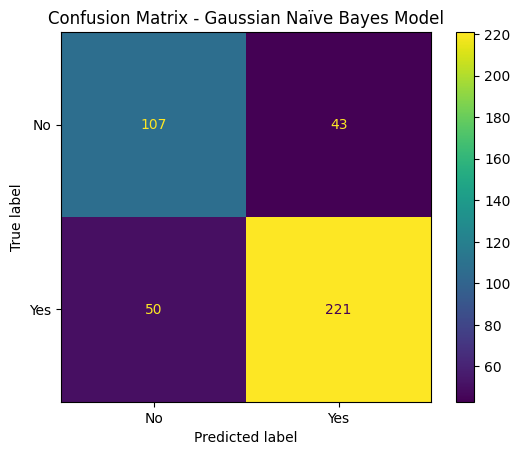

In [17]:
#Defining the model - GaussianNB Classifier
clf = GaussianNB().fit(X_train_norm, y_train)
y_pred_gnb = clf.predict(X_test_norm)

print(f'GaussianNB Model Metrics:')
print(f'\tAccuracy: {accuracy_score(y_test, y_pred_gnb):.4f}')
print(f'\tPrecision: {precision_score(y_test, y_pred_gnb):.4f}')
print(f'\tRecall: {recall_score(y_test, y_pred_gnb):.4f}')
print(f'\tF1 Score: {f1_score(y_test, y_pred_gnb):.4f}')

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_gnb), display_labels = ['No', 'Yes'])
cm_display.plot()
plt.title("Confusion Matrix - Gaussian Naïve Bayes Model")
plt.show()

## 3.8 K-Nearest Neighbors

KNN Model Metrics:
	Accuracy: 0.7316
	Precision: 0.7862
	Recall: 0.8007
	F1 Score: 0.7934


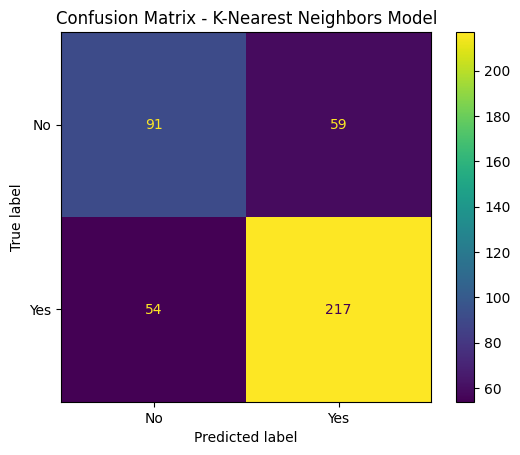

In [18]:
#Defining the model - KNN Classifier
clf = KNeighborsClassifier().fit(X_train_norm, y_train)
y_pred_knn = clf.predict(X_test_norm)

print(f'KNN Model Metrics:')
print(f'\tAccuracy: {accuracy_score(y_test, y_pred_knn):.4f}')
print(f'\tPrecision: {precision_score(y_test, y_pred_knn):.4f}')
print(f'\tRecall: {recall_score(y_test, y_pred_knn):.4f}')
print(f'\tF1 Score: {f1_score(y_test, y_pred_knn):.4f}')

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_knn), display_labels = ['No', 'Yes'])
cm_display.plot()
plt.title("Confusion Matrix - K-Nearest Neighbors Model")
plt.show()

## 3.9 Category Boosting

CatBoost Model Metrics:
	Accuracy: 0.9454
	Precision: 0.9697
	Recall: 0.9446
	F1 Score: 0.9570


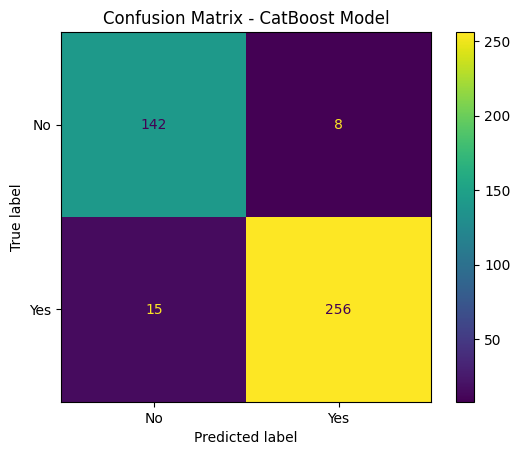

In [19]:
#Defining model - CatBoost Model
catboost = CatBoostClassifier(learning_rate=0.3,random_state=42, verbose=0).fit(X_train_norm, y_train)
y_pred_cat = catboost.predict(X_test_norm)

print(f'CatBoost Model Metrics:')
print(f'\tAccuracy: {accuracy_score(y_test, y_pred_cat):.4f}')
print(f'\tPrecision: {precision_score(y_test, y_pred_cat):.4f}')
print(f'\tRecall: {recall_score(y_test, y_pred_cat):.4f}')
print(f'\tF1 Score: {f1_score(y_test, y_pred_cat):.4f}')

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_cat), display_labels = ['No', 'Yes'])
cm_display.plot()
plt.title("Confusion Matrix - CatBoost Model")
plt.show()

## 3.10 eXtreme Gradient Boosting

XGBoost Model Metrics:
	Accuracy: 0.9145
	Precision: 0.9572
	Recall: 0.9077
	F1 Score: 0.9318


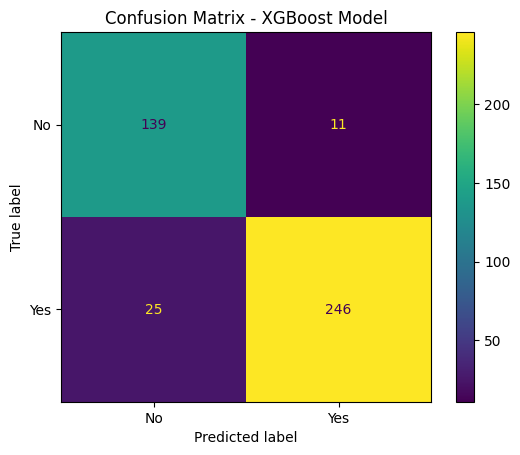

In [20]:
#Defining model - XGBoost Classifier
xgboost = XGBClassifier().fit(X_train_norm, y_train)
y_pred_xgb = xgboost.predict(X_test_norm)

print(f'XGBoost Model Metrics:')
print(f'\tAccuracy: {accuracy_score(y_test, y_pred_xgb):.4f}')
print(f'\tPrecision: {precision_score(y_test, y_pred_xgb):.4f}')
print(f'\tRecall: {recall_score(y_test, y_pred_xgb):.4f}')
print(f'\tF1 Score: {f1_score(y_test, y_pred_xgb):.4f}')

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_xgb), display_labels = ['No', 'Yes'])
cm_display.plot()
plt.title("Confusion Matrix - XGBoost Model")
plt.show()

# 4. Results

<table>
    <thead>
        <tr>
            <th>Model</th>
            <th>Accuracy</th>
            <th>Precision</th>
            <th>Recall</th>
            <th>F1 Score</th>
        </tr>
    </thead>
    <tbody>
        <!--Linear Regression Results-->
        <tr>
            <td>Linear Regression</td>
            <td>0.7797</td>
            <td>0.8149</td>
            <td>0.8450</td>
            <td>0.8297</td>
        </tr>
        <!--SVM Results-->
        <tr>
            <td>Support Vector Machines</td>
            <td>0.7838</td>
            <td>0.8169</td>
            <td>0.8561</td>
            <td>0.8360</td>
        </tr>
        <!--Decision Tree Results-->
        <tr>
            <td>Decision Tree</td>
            <td>0.8741</td>
            <td>0.9129</td>
            <td>0.8893</td>
            <td>0.9009</td>
        </tr>
        <!--Random Forests Results-->
        <tr>
            <td>Random Forests</td>
            <td>0.9121</td>
            <td>0.9466</td>
            <td>0.9151</td>
            <td>0.9306</td>
        </tr>
        <!--Gradient Boosting Machines Results-->
        <tr>
            <td>Gradient Boosting Machines</td>
            <td>0.9145</td>
            <td>0.9434</td>
            <td>0.9225</td>
            <td>0.9328</td>
        </tr>
        <!--AdaBoost Results-->
        <tr>
            <td>AdaBoost</td>
            <td>0.9240</td>
            <td>0.9377</td>
            <td>0.9446</td>
            <td>0.9412</td>
        </tr>       
        <!--Naïve Bayes (GaussianNB) Results-->
        <tr>
            <td>Naïve Bayes (GaussianNB)</td>
            <td>0.7791</td>
            <td>0.8371</td>
            <td>0.8155</td>
            <td>0.8262</td>
        </tr>
        <!--K-Nearest Neighbors Results-->
        <tr>
            <td>K-Nearest Neighbors</td>
            <td>0.7316</td>
            <td>0.7862</td>
            <td>0.8007</td>
            <td>0.7934</td>
        </tr>
        <!--Category Boosting Results-->
        <tr>
            <td>Category Boosting</td>
            <td style="color:red">0.9454</td>
            <td style="color:red">0.9697</td>
            <td style="color:red">0.9446</td>
            <td style="color:red">0.9570</td>
        </tr>
        <!--eXtreme Gradient Boosting Results-->
        <tr>
            <td>eXtreme Gradient Boosting</td>
            <td>0.9145</td>
            <td>0.9572</td>
            <td>0.9077</td>
            <td>0.9318</td>
        </tr>
    </tbody>
</table>


# 5. Conclusion

## 5.1 Key Observations
* Top Performers: Models like AdaBoost, Category Boosting, Random Forests, and Gradient Boosting Machines consistently show high accuracy, precision, recall, and F1 scores. These models are robust and perform well across multiple metrics.

* Linear Regression: While it shows decent performance, its metrics are generally lower compared to the other models. Linear Regression might not capture complex relationships in the data as effectively as other models designed for classification tasks.

* K-Nearest Neighbors and Naïve Bayes: These models show lower performance metrics compared to others, which might indicate that their underlying assumptions or structure might not fit the data distribution as well in this context.

## 5.2 Final thoughts
* Model Selection: Based on these results, AdaBoost, Category Boosting, Random Forests, and Gradient Boosting Machines appear to be the top contenders for predicting Parkinson's Disease based on the given dataset.

* Further Investigation: It would be beneficial to analyze feature importance, conduct hyperparameter tuning, and potentially explore ensemble methods or feature engineering to further improve the performance of these models.